In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([2903., 1311.,  944.,  807.,  804.,  714.,  740.,  706.,  668.,
         713.,  581.,  584.,  596.,  432.,  458.,  409.,  412.,  334.,
         266.,  288.,  273.,  237.,  213.,  166.,  187.,  157.,  175.,
         141.,  122.,  106.,  120.,   96.,   81.,   82.,   61.,   57.,
          65.,   50.,   44.,   37.,   33.,   21.,   27.,   30.,   30.,
          29.,   19.,   16.,   17.,    3.,    3.,    5.,    6.]),
 array([  1.        ,  19.41509434,  37.83018868,  56.24528302,
         74.66037736,  93.0754717 , 111.49056604, 129.90566038,
        148.32075472, 166.73584906, 185.1509434 , 203.56603774,
        221.98113208, 240.39622642, 258.81132075, 277.22641509,
        295.64150943, 314.05660377, 332.47169811, 350.88679245,
        369.30188679, 387.71698113, 406.13207547, 424.54716981,
        442.96226415, 461.37735849, 479.79245283, 498.20754717,
        516.62264151, 535.03773585, 553.45283019, 571.86792453,
        590.28301887, 608.69811321, 627.11320755, 645.52830189,
   

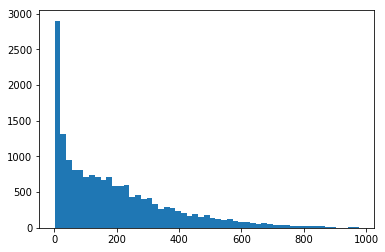

In [4]:
plt.hist(bike_rentals["cnt"], bins="auto")

In [5]:
bike_rentals.corr()["cnt"][:-1]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
Name: cnt, dtype: float64

Write a function called assign_label that takes in a numeric value for an hour, and returns:

1 if the hour is from 6 to 12

2 if the hour is from 12 to 18

3 if the hour is from 18 to 24

4 if the hour is from 0 to 6

Use the apply method on series objects to apply the function to each item in the hr column.

Assign the result to the time_label column of bike_rentals.

In [6]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    else:
        return hour//6
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [7]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


Based on your explorations of the cnt column, pick an error metric you want to use to evaluate the performance of the machine learning algorithms. Explain why you chose this metric in a markdown cell.

Select 80% of the rows in bike_rentals to be part of the training set using the sample method on bike_rentals. Assign the result to train.

Select the rows that are in bike_rentals but not in train to be in the testing set. Assign the result to test.

This line will generate a Boolean series that's False when a row in bike_rentals isn't found in train: bike_rentals.index.isin(train.index)

This line will select any rows in bike_rentals that aren't found in train to be in the testing set: bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [8]:
perm = np.random.permutation(bike_rentals.index)
train_ratio = .8
divider = int(len(bike_rentals) * train_ratio)
sample = bike_rentals.copy().iloc[perm]
train = sample.iloc[:divider, :]
test = sample.iloc[divider:, :]
print(len(train), len(test))

13903 3476


Create a list of predictor columns to use in training and predictions.

At a minimum, this list should exclude the cnt, casual, dteday, and registered columns.

Feel free to remove other columns you don't think will be useful for the predictions.

Use the LinearRegression class from sklearn to train a machine learning algorithm on train.

Use only the columns in the list of predictors for this.
    
Make predictions using the LinearRegression class on test.

Use the exact same predictor columns here.

Calculate the error between the predictions and the actual values.

Write your thoughts about the predictions and the error in a markdown cell.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
features = ['season', 'mnth', 'hr', 'holiday', 'weekday',
            'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
lr = LinearRegression()
lr.fit(train[features], train["cnt"])
yhat = lr.predict(test[features])
print("Confidence:", lr.score(test[features], test["cnt"]))
rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
print("RMSE:", rmse)

Confidence: 0.3428142342379581
RMSE: 151.99770532859034


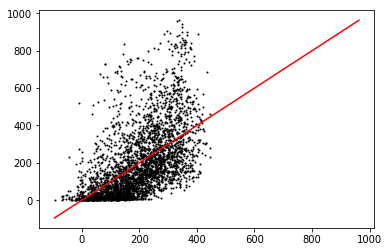

In [11]:
plt.scatter(yhat, test["cnt"], c="k", s=1)
plt.plot([min(yhat.min(), test["cnt"].min()), max(yhat.max(), test["cnt"].max())], 
         [min(yhat.min(), test["cnt"].min()), max(yhat.max(), test["cnt"].max())],
         c="r")

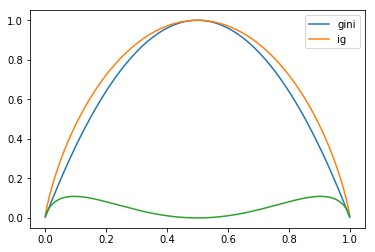

In [12]:
p = np.linspace(0, 1, 1001)[1:-1]
q = 1 - p
gini = 1 - p**2 - q**2
ig = -1*(p*np.log2(p) + q*np.log2(q))
plt.plot(p, 2*gini, label="gini")
plt.plot(p, ig, label = "ig")
plt.plot(p, ig - 2*gini)
plt.legend()

Use the DecisionTreeRegressor class to fit a decision tree algorithm to the train data.

Make predictions using the DecisionTreeRegressor class on test.

Calculate the error between the predictions and the actual values.

Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.

Write your thoughts on the predictions and the error in a markdown cell.

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
dtr = DecisionTreeRegressor()
dtr.fit(train[features], train["cnt"])
yhat = dtr.predict(test[features])
print("Confidence:", dtr.score(test[features], test["cnt"]))
rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
print("RMSE:", rmse)

Confidence: 0.7627337132524844
RMSE: 91.32947773872145


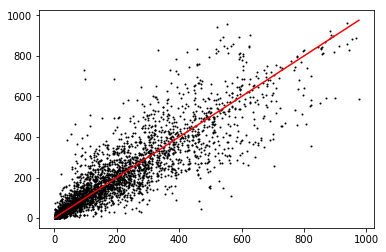

In [15]:
plt.scatter(yhat, test["cnt"], c="k", s=1)
plt.plot([min(yhat.min(), test["cnt"].min()), max(yhat.max(), test["cnt"].max())], 
         [min(yhat.min(), test["cnt"].min()), max(yhat.max(), test["cnt"].max())],
         c="r")

[0.76324896 0.78243202 0.79533447 0.80137114 0.8066902  0.8112658
 0.81806377 0.81880762 0.82556258 0.82568353 0.82679147 0.82733917
 0.82422659 0.82669659 0.83120004 0.83190745 0.82998603 0.8295426
 0.82552525] [91.2278086  87.45559469 84.82315514 83.56288049 82.43656263 81.45508686
 79.97465737 79.81102544 78.30919864 78.28204592 78.03287094 77.90940083
 78.60850406 78.05423873 77.0334074  76.87182387 77.30992708 77.41068045
 78.31757683]


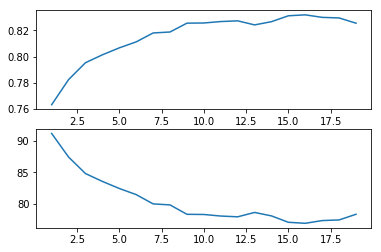

In [16]:
msls = range(1, 20)

scores_matrix = []
rmses_matrix = []
for i in range(100):
    scores = []
    rmses = []
    for msl in msls:
        dtr = DecisionTreeRegressor(min_samples_leaf=msl)
        dtr.fit(train[features], train["cnt"])
        yhat = dtr.predict(test[features])
        scores.append(dtr.score(test[features], test["cnt"]))
        rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
        rmses.append(rmse)
    scores_matrix.append(scores)
    rmses_matrix.append(rmses)

scores = np.average(scores_matrix, axis=0)
rmses = np.average(rmses_matrix, axis=0)

print(scores, rmses)

f, ax = plt.subplots(2)
ax[0].plot(msls, scores)
ax[1].plot(msls, rmses)

In [17]:
print(list(scores).index(max(scores)))
print(list(rmses).index((min(rmses))))

15
15


[0.40552568 0.47464734 0.56833742 0.61932194 0.69588636 0.74019435
 0.76784349 0.80485162 0.82501429 0.8276797  0.82804565 0.82832344
 0.826291   0.82643343 0.82615196 0.82649094 0.82555101 0.82569076
 0.82572207 0.82567804 0.82566748 0.82569106 0.82568894 0.82566991
 0.82567759 0.8256667  0.82570194 0.82568812] [144.56378399 135.89967658 123.18707909 115.68362275 103.39770733
  95.56904594  90.34068823  82.8276685   78.43217203  77.83253414
  77.74984709  77.68701829  78.14552597  78.11348125  78.17679289
  78.10053823  78.31179528  78.28042167  78.27339165  78.2832783
  78.28564911  78.28035463  78.28083113  78.2851043   78.28337857
  78.28582503  78.27791068  78.28101504]


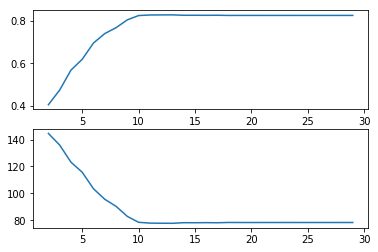

In [19]:
mds = range(2, 30)
scores_matrix = []
rmses_matrix = []
for i in range(10):
    scores = []
    rmses = []
    for md in mds:
        dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=md)
        dtr.fit(train[features], train["cnt"])
        yhat = dtr.predict(test[features])
        scores.append(dtr.score(test[features], test["cnt"]))
        rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
        rmses.append(rmse)
    scores_matrix.append(scores)
    rmses_matrix.append(rmses)

scores = np.average(scores_matrix, axis=0)
rmses = np.average(rmses_matrix, axis=0)

print(scores, rmses)

f, ax = plt.subplots(2)
ax[0].plot(mds, scores)
ax[1].plot(mds, rmses)

[0.29308603 0.40194767 0.45025621 0.51626938 0.53389121 0.55473956
 0.57657733 0.59269406 0.61015536 0.62409766 0.64878689 0.67532757
 0.6826765  0.69038221 0.69537682 0.69633844 0.69863644 0.7021232
 0.70583731 0.70787003 0.7106134  0.7133668  0.71694481 0.71848706
 0.71985696 0.72160098 0.72407901 0.72595938 0.72492041 0.72665829
 0.72713018 0.72702742 0.72904386 0.73126538 0.74036531 0.74335779
 0.74545073 0.74705734 0.74794907 0.7490367  0.75104213 0.75202337
 0.75389773 0.75526772 0.75674897 0.75805989 0.75987158 0.76086929
 0.76308558 0.77677233 0.78001862 0.78511151 0.78691663 0.78778418
 0.78920489 0.79068204 0.7923309  0.79340728 0.79319889 0.79310305
 0.79397651 0.7946771  0.79538325 0.79545896 0.79556967 0.79611204
 0.79797765 0.79844507 0.79862071 0.79896388 0.80252919 0.80289484
 0.803182   0.80375196 0.80380467 0.80448704 0.80509551 0.8054352
 0.80597302 0.80710388 0.80768725 0.80784903 0.80776883 0.80880896
 0.80911179 0.80839346 0.80801154 0.80845143 0.80912714 0.809984

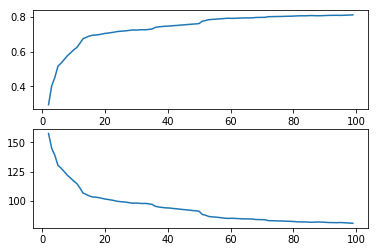

In [21]:
mlns = range(2, 100)
scores_matrix = []
rmses_matrix = []
for i in range(10):
    scores = []
    rmses = []
    for mln in mlns:
        dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10, max_leaf_nodes=mln)
        dtr.fit(train[features], train["cnt"])
        yhat = dtr.predict(test[features])
        scores.append(dtr.score(test[features], test["cnt"]))
        rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
        rmses.append(rmse)
    scores_matrix.append(scores)
    rmses_matrix.append(rmses)

scores = np.average(scores_matrix, axis=0)
rmses = np.average(rmses_matrix, axis=0)

print(scores, rmses)

f, ax = plt.subplots(2)
ax[0].plot(mlns, scores)
ax[1].plot(mlns, rmses)

In [29]:
mids = np.linspace(0, 0.5, 100)
scores_matrix = []
rmses_matrix = []
for i in range(10):
    scores = []
    rmses = []
    for mid in mids:
        dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10, min_impurity_decrease=mid)
        dtr.fit(train[features], train["cnt"])
        yhat = dtr.predict(test[features])
        scores.append(dtr.score(test[features], test["cnt"]))
        rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
        rmses.append(rmse)
    scores_matrix.append(scores)
    rmses_matrix.append(rmses)

scores = np.average(scores_matrix, axis=0)
rmses = np.average(rmses_matrix, axis=0)

print(scores, rmses)

f, ax = plt.subplots(2)
ax[0].plot(mids, scores)
ax[1].plot(mids, rmses)

[0.82502482 0.82500495 0.82502665 0.82501719 0.82500985 0.82505875
 0.82506817 0.82503548 0.82506405 0.82506852 0.82506498 0.82503993
 0.82504716 0.82507209 0.8250579  0.82502547 0.82503167 0.82502832
 0.82501818 0.8250066  0.82501465 0.82502377 0.82498819 0.82503622
 0.82502776 0.82500694 0.82505048 0.82507377 0.82506053 0.82504965
 0.82502422 0.82504382 0.82506557 0.82508616 0.82507626 0.82507123
 0.82504399 0.82503518 0.82501884 0.82499488 0.82498439 0.8250194
 0.8250058  0.82502925 0.82503807 0.8250367  0.82501008 0.82500803
 0.82499989 0.82502453 0.82501461 0.82498061 0.82499703 0.82507962
 0.8250359  0.82503359 0.82493599 0.82494427 0.82494442 0.82493972
 0.82493332 0.82494025 0.82493688 0.82494159 0.82497421 0.82499096
 0.8249923  0.82498492 0.82499803 0.82499756 0.825008   0.82498962
 0.82499397 0.82502373 0.82501399 0.8250123  0.82500077 0.82498619
 0.82496415 0.82493722 0.82493588 0.82493353 0.82493486 0.82494091
 0.82487936 0.82488305 0.82488843 0.82488843 0.82489794 0.82488

In [35]:
scores = []
rmses = []
for i in range(10):
    dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)
    dtr.fit(train[features], train["cnt"])
    scores.append(dtr.score(test[features], test["cnt"]))
    yhat = dtr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(yhat, test["cnt"]))
    rmses.append(rmse)

print(np.average(scores), np.average(rmses))



0.8250438759486556 78.42554227265045


In [36]:
scores = []
rmses = []
for i in range(10):
    dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)
    dtr.fit(train[features], train["registered"])
    scores.append(dtr.score(test[features], test["registered"]))
    yhat = dtr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(yhat, test["registered"]))
    rmses.append(rmse)

print(np.average(scores), np.average(rmses))

0.8118918613138104 67.76869597517563


In [37]:
scores = []
rmses = []
for i in range(10):
    dtr = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)
    dtr.fit(train[features], train["casual"])
    scores.append(dtr.score(test[features], test["casual"]))
    yhat = dtr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(yhat, test["casual"]))
    rmses.append(rmse)

print(np.average(scores), np.average(rmses))

0.8157986753966988 21.541359580387443
